
Predicting Bladder:
Training RMSE: 8.39, MAE: 6.66, R-squared: 0.02
Testing RMSE: 16.52, MAE: 11.61, R-squared: -1.10
CPU Percent: Before=30.0%, After=23.1%
Memory Usage: Before=15525.25 MB, After=15525.66 MB
Training Time: 0.01 seconds

Percentage Change in Bladder Incidents: -50.46%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


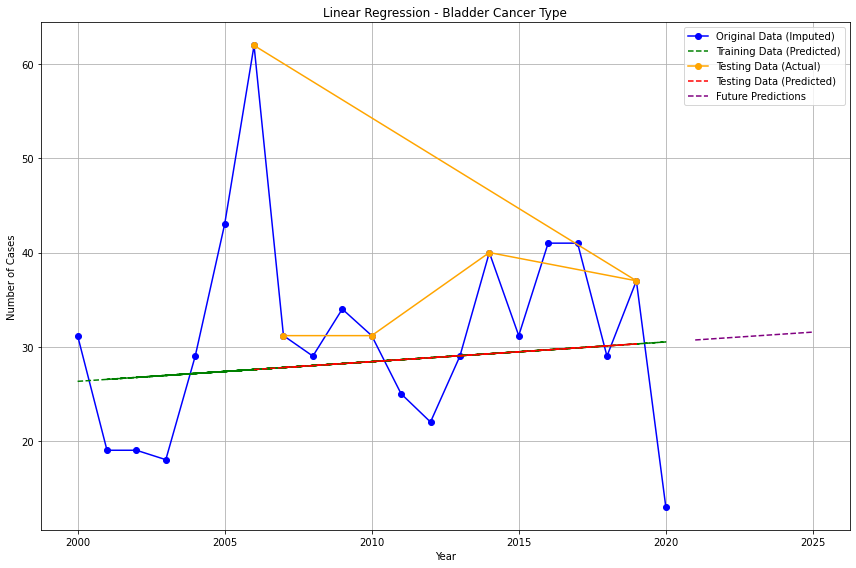


Predicting Brain:
Training RMSE: 7.40, MAE: 6.56, R-squared: 0.31
Testing RMSE: 17.94, MAE: 12.90, R-squared: -0.01
CPU Percent: Before=26.0%, After=12.5%
Memory Usage: Before=15540.97 MB, After=15540.97 MB
Training Time: 0.01 seconds

Percentage Change in Brain Incidents: -71.98%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


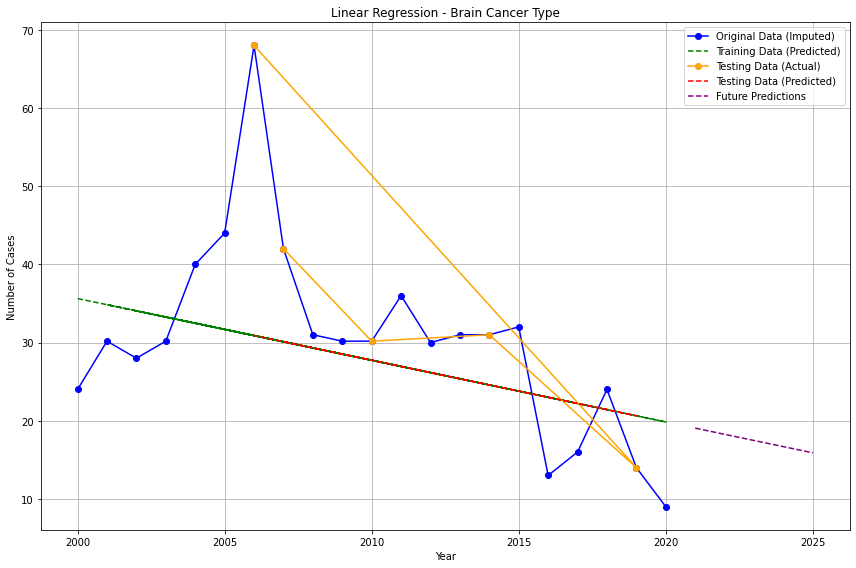


Predicting Breast:
Training RMSE: 28.28, MAE: 21.45, R-squared: 0.52
Testing RMSE: 48.71, MAE: 35.60, R-squared: -0.07
CPU Percent: Before=31.6%, After=0.0%
Memory Usage: Before=15543.87 MB, After=15543.30 MB
Training Time: 0.00 seconds

Percentage Change in Breast Incidents: 32.66%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


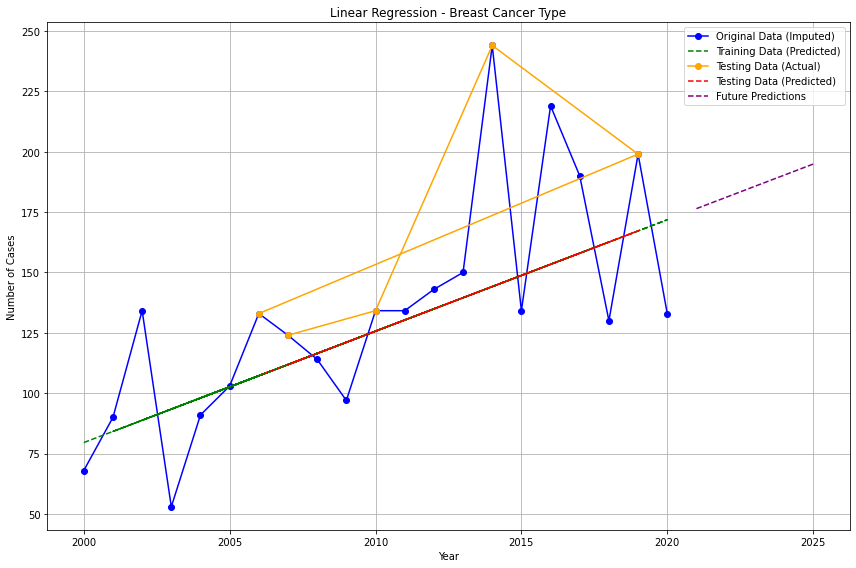


Predicting Bronchus_Lung:
Training RMSE: 19.94, MAE: 16.74, R-squared: 0.00
Testing RMSE: 26.11, MAE: 20.66, R-squared: -0.51
CPU Percent: Before=33.0%, After=0.0%
Memory Usage: Before=15542.89 MB, After=15542.89 MB
Training Time: 0.00 seconds

Percentage Change in Bronchus_Lung Incidents: -7.55%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


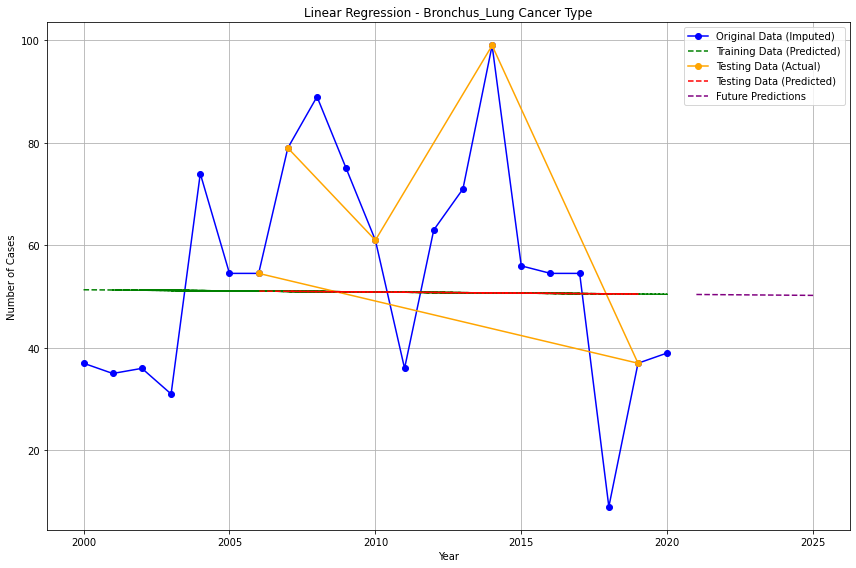


Predicting Colorectal:
Training RMSE: 11.76, MAE: 9.58, R-squared: 0.11
Testing RMSE: 7.23, MAE: 6.10, R-squared: -1.65
CPU Percent: Before=37.8%, After=88.9%
Memory Usage: Before=15546.57 MB, After=15546.57 MB
Training Time: 0.01 seconds

Percentage Change in Colorectal Incidents: 0.61%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


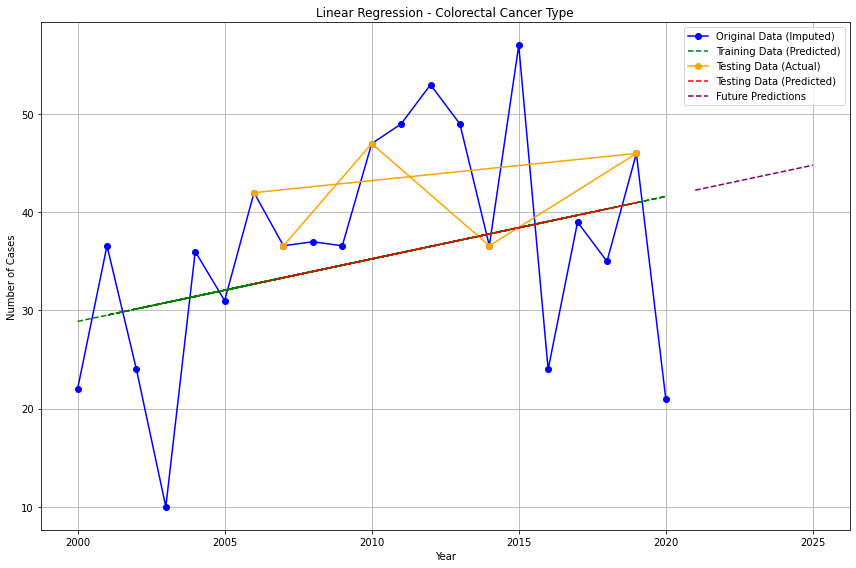


Predicting Leukemia:
Training RMSE: 7.82, MAE: 6.92, R-squared: 0.41
Testing RMSE: 13.32, MAE: 12.12, R-squared: -2.46
CPU Percent: Before=25.5%, After=0.0%
Memory Usage: Before=15554.11 MB, After=15554.11 MB
Training Time: 0.00 seconds

Percentage Change in Leukemia Incidents: 22.42%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


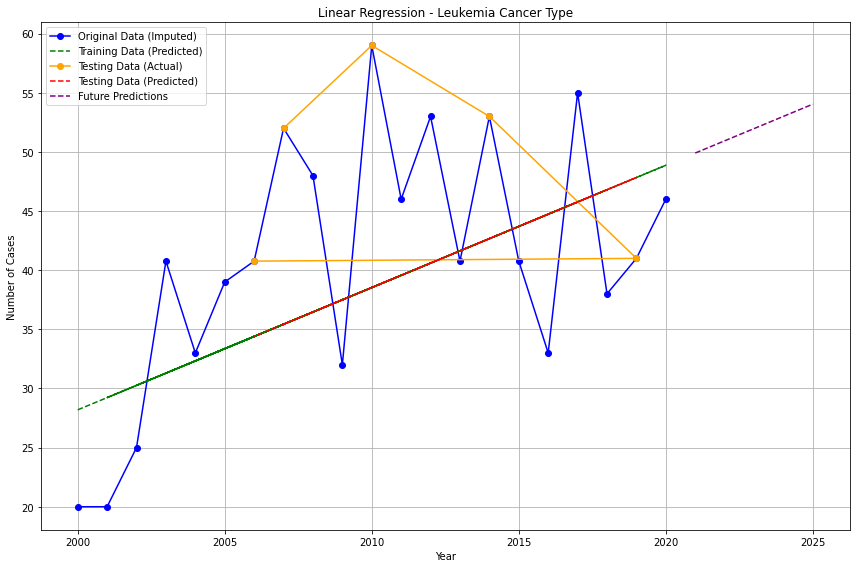


Predicting Non_Hodgkins_Lymphoma:
Training RMSE: 7.92, MAE: 5.70, R-squared: 0.16
Testing RMSE: 11.81, MAE: 8.52, R-squared: -0.37
CPU Percent: Before=29.7%, After=87.5%
Memory Usage: Before=15550.37 MB, After=15550.23 MB
Training Time: 0.00 seconds

Percentage Change in Non_Hodgkins_Lymphoma Incidents: -27.74%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


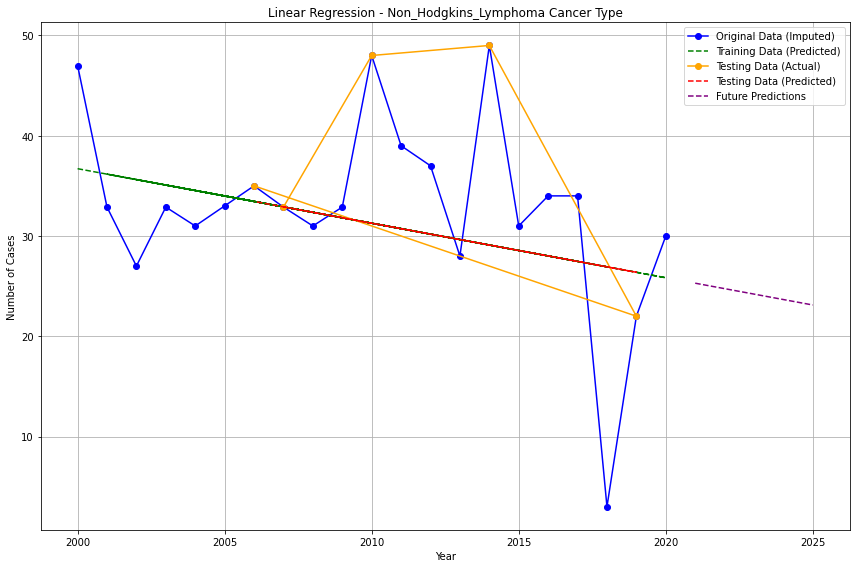


Predicting Stomach:
Training RMSE: 7.86, MAE: 6.46, R-squared: 0.05
Testing RMSE: 7.93, MAE: 6.23, R-squared: 0.08
CPU Percent: Before=37.2%, After=0.0%
Memory Usage: Before=15553.54 MB, After=15553.42 MB
Training Time: 0.00 seconds

Percentage Change in Stomach Incidents: -11.19%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3583861397.py:108: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


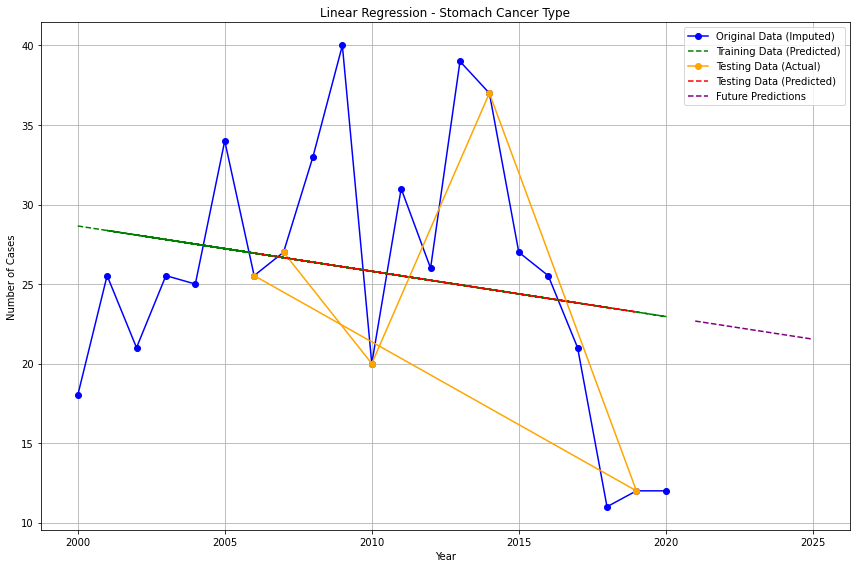

In [1]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import psutil
import time

# Function to get CPU percent and Memory usage
def get_system_metrics():
    cpu_percent = psutil.cpu_percent()
    memory_mb = psutil.virtual_memory().used / (1024 ** 2)
    return cpu_percent, memory_mb

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# List of cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'Training_RMSE', 'Testing_RMSE', 'Training_MAE', 'Testing_MAE', 'Training_R_Squared', 'Testing_R_Squared', 'CPU_Before', 'CPU_After', 'Memory_Before_MB', 'Memory_After_MB', 'Training_Time', 'Percentage_Change'])

# Calculate future predictions outside the loop
future_years = np.arange(2021, 2026).reshape(-1, 1)

# Iterate through each cancer type
for cancer_type in cancer_columns:
    print(f"\nPredicting {cancer_type}:")
    
    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Introduce missing data
    data_missing = data.copy()
    missing_indices = np.random.choice(len(data_missing), size=int(0.2 * len(data_missing)), replace=False)
    data_missing.loc[missing_indices, cancer_type] = np.nan

    # Imputation using mean imputation as an example
    imputer = SimpleImputer(strategy='mean')
    data_imputed = pd.DataFrame(imputer.fit_transform(data_missing), columns=data_missing.columns)

    # Data Augmentation by shuffling rows
    data_augmented = shuffle(data_imputed, random_state=42)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data_augmented['Year'].values.reshape(-1, 1), data_augmented[cancer_type].values.reshape(-1, 1), test_size=0.2, shuffle=False)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Measure CPU percent and Memory before training
    cpu_before, memory_before = get_system_metrics()
    
    # Training the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Measure CPU percent and Memory after training
    cpu_after, memory_after = get_system_metrics()

    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluation Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
    mae_train = mean_absolute_error(y_train, train_predictions)
    r2_train = r2_score(y_train, train_predictions)

    rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
    mae_test = mean_absolute_error(y_test, test_predictions)
    r2_test = r2_score(y_test, test_predictions)

    # Print Evaluation Metrics
    print(f"Training RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R-squared: {r2_train:.2f}")
    print(f"Testing RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R-squared: {r2_test:.2f}")

    # Print System Metrics
    print(f"CPU Percent: Before={cpu_before}%, After={cpu_after}%")
    print(f"Memory Usage: Before={memory_before:.2f} MB, After={memory_after:.2f} MB")
    print(f"Training Time: {training_time:.2f} seconds\n")

    # Calculate percentage change in cancer incidents
    last_year_actual = y_test[-1][0]
    future_predictions = model.predict(future_years)
    predicted_next_year = future_predictions[0][0]
    percentage_change = ((predicted_next_year - last_year_actual) / last_year_actual) * 100

    print(f"Percentage Change in {cancer_type} Incidents: {percentage_change:.2f}%\n")

    # Save results to the DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': 'Linear Regression',
        'Training_RMSE': rmse_train,
        'Testing_RMSE': rmse_test,
        'Training_MAE': mae_train,
        'Testing_MAE': mae_test,
        'Training_R_Squared': r2_train,
        'Testing_R_Squared': r2_test,
        'CPU_Before': cpu_before,
        'CPU_After': cpu_after,
        'Memory_Before_MB': memory_before,
        'Memory_After_MB': memory_after,
        'Training_Time': training_time,
        'Percentage_Change': percentage_change
    }, ignore_index=True)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Training fit
    plt.plot(data_imputed['Year'], data_imputed[cancer_type], label='Original Data (Imputed)', marker='o', linestyle='-', color='blue')
    plt.plot(X_train, train_predictions, label='Training Data (Predicted)', linestyle='--', color='green')

    # Testing fit
    plt.plot(X_test, y_test, label='Testing Data (Actual)', marker='o', linestyle='-', color='orange')
    plt.plot(X_test, test_predictions, label='Testing Data (Predicted)', linestyle='--', color='red')

    # Future predictions
    plt.plot(future_years, future_predictions, label='Future Predictions', linestyle='--', color='purple')

    plt.title(f'Linear Regression - {cancer_type} Cancer Type')
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for better spacing
    
    # Save the plot
    plt.savefig(f'{cancer_type}_linear_regression_plot.png')
    plt.show()

# Save the results DataFrame to a CSV file
results_df.to_csv('linear_regression_results.csv', index=False)



Augmenting and Imputing Bladder Data:
Training RMSE: 10.20, MAE: 6.94, R-squared: 0.07
Testing RMSE: 12.19, MAE: 8.70, R-squared: -0.61
CPU Percent: Before=15.5%, After=33.3%
Memory Usage: Before=13936.56 MB, After=13936.56 MB
Training Time: 0.00 seconds

Percentage Change in Bladder Incidents: 197.75%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


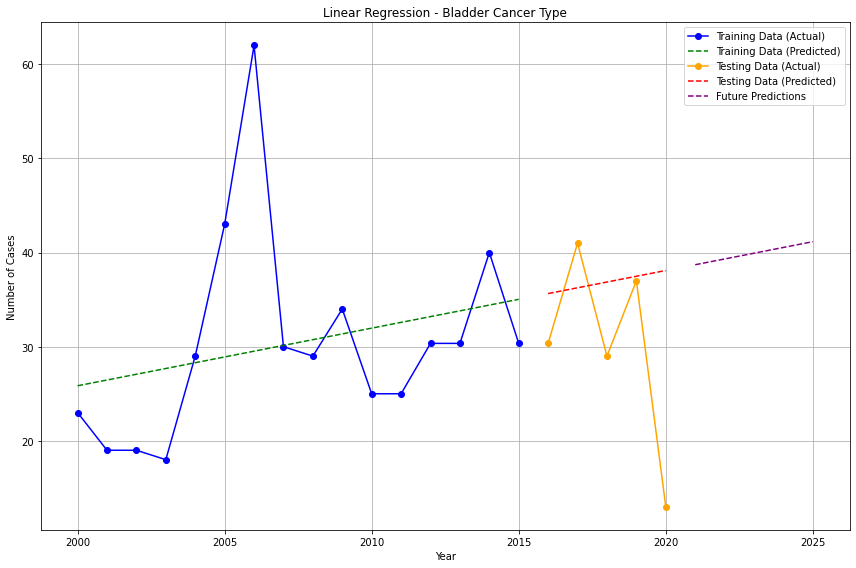


Augmenting and Imputing Brain Data:
Training RMSE: 10.21, MAE: 6.80, R-squared: 0.00
Testing RMSE: 13.99, MAE: 11.89, R-squared: -2.45
CPU Percent: Before=41.2%, After=42.9%
Memory Usage: Before=13938.44 MB, After=13939.97 MB
Training Time: 0.00 seconds

Percentage Change in Brain Incidents: 13.28%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


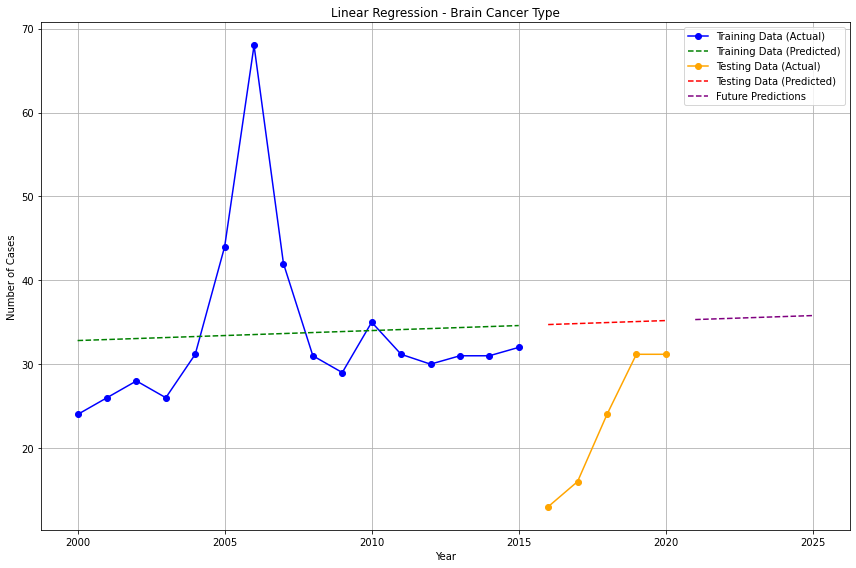


Augmenting and Imputing Breast Data:
Training RMSE: 19.11, MAE: 14.55, R-squared: 0.66
Testing RMSE: 50.02, MAE: 47.34, R-squared: -0.72
CPU Percent: Before=41.7%, After=0.0%
Memory Usage: Before=13937.87 MB, After=13937.87 MB
Training Time: 0.00 seconds

Percentage Change in Breast Incidents: 53.45%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


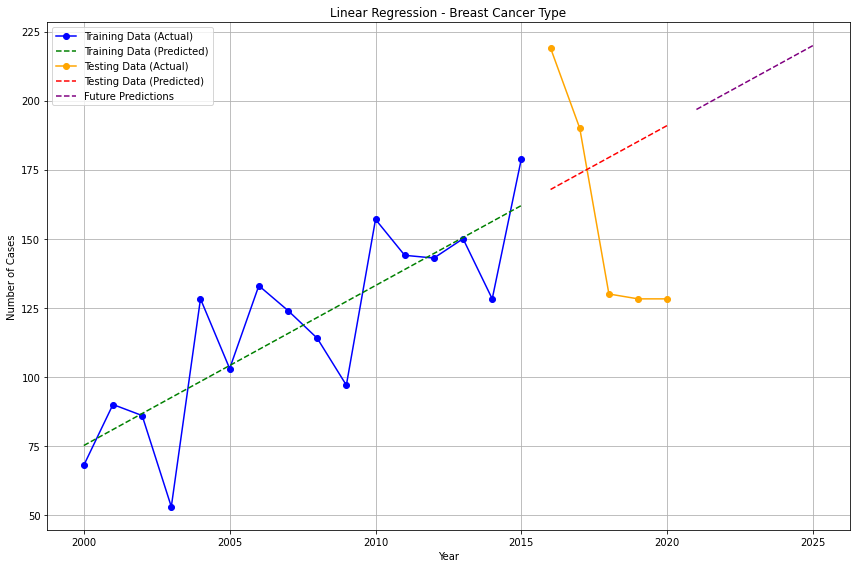


Augmenting and Imputing Bronchus_Lung Data:
Training RMSE: 22.27, MAE: 18.59, R-squared: 0.08
Testing RMSE: 51.83, MAE: 50.55, R-squared: -16.31
CPU Percent: Before=35.4%, After=75.0%
Memory Usage: Before=13946.15 MB, After=13946.15 MB
Training Time: 0.00 seconds

Percentage Change in Bronchus_Lung Incidents: 109.93%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


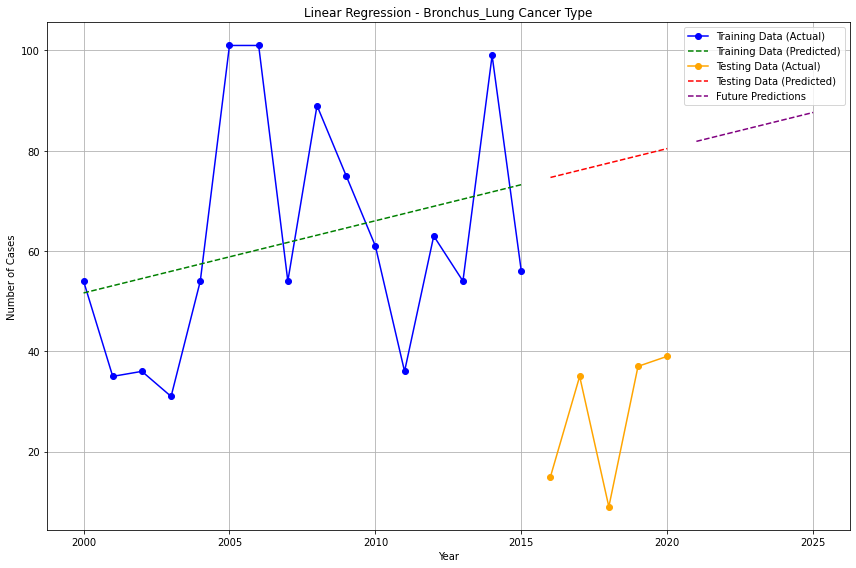


Augmenting and Imputing Colorectal Data:
Training RMSE: 9.83, MAE: 7.60, R-squared: 0.48
Testing RMSE: 25.13, MAE: 23.15, R-squared: -8.44
CPU Percent: Before=35.0%, After=22.2%
Memory Usage: Before=13944.05 MB, After=13941.11 MB
Training Time: 0.00 seconds

Percentage Change in Colorectal Incidents: 208.93%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


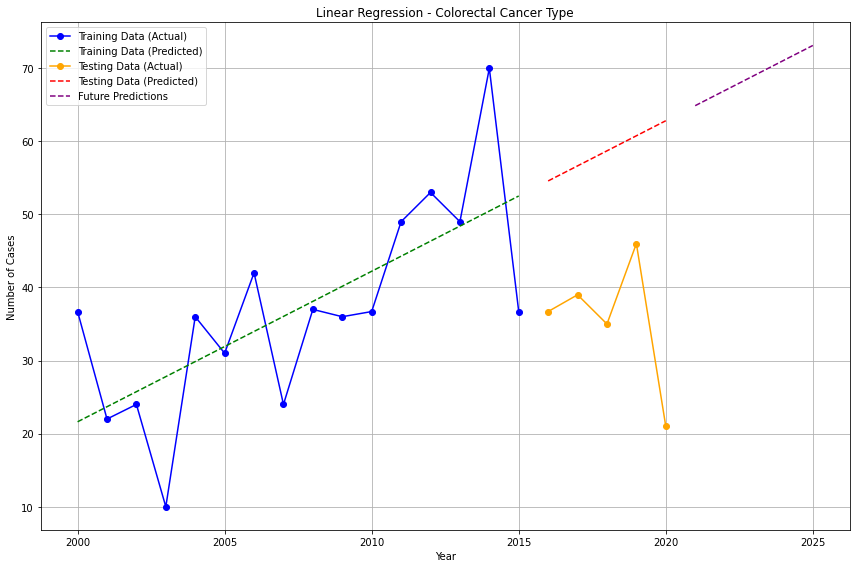


Augmenting and Imputing Leukemia Data:
Training RMSE: 9.83, MAE: 7.25, R-squared: 0.45
Testing RMSE: 22.44, MAE: 22.36, R-squared: -85.08
CPU Percent: Before=36.7%, After=0.0%
Memory Usage: Before=13934.21 MB, After=13934.21 MB
Training Time: 0.00 seconds

Percentage Change in Leukemia Incidents: 68.02%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


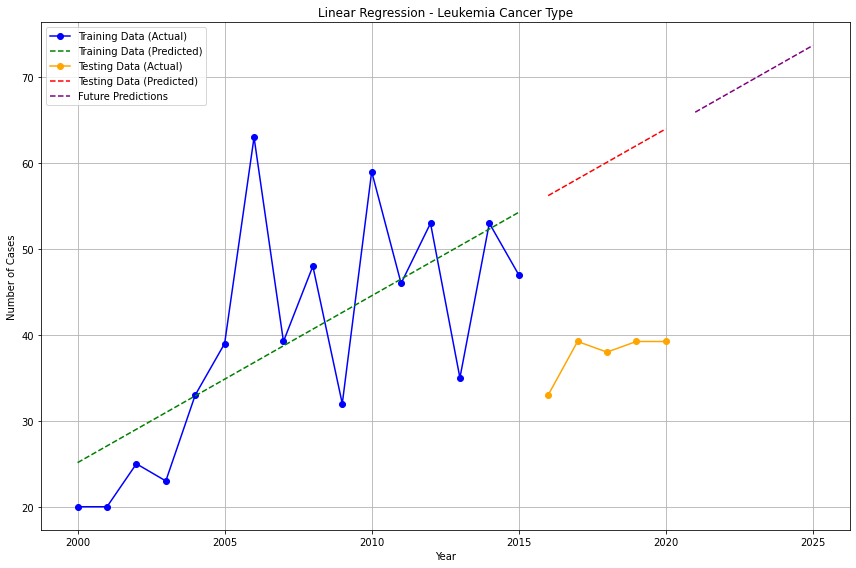


Augmenting and Imputing Non_Hodgkins_Lymphoma Data:
Training RMSE: 8.26, MAE: 6.22, R-squared: 0.03
Testing RMSE: 15.67, MAE: 10.34, R-squared: -0.81
CPU Percent: Before=39.4%, After=0.0%
Memory Usage: Before=13941.92 MB, After=13941.92 MB
Training Time: 0.00 seconds

Percentage Change in Non_Hodgkins_Lymphoma Incidents: 19.84%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


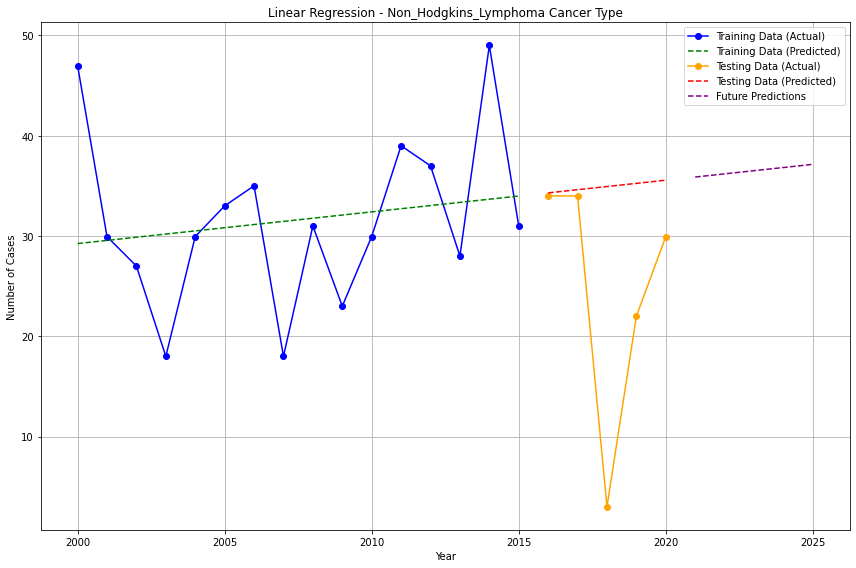


Augmenting and Imputing Stomach Data:
Training RMSE: 5.21, MAE: 4.47, R-squared: 0.29
Testing RMSE: 22.27, MAE: 21.65, R-squared: -25.16
CPU Percent: Before=25.0%, After=0.0%
Memory Usage: Before=13942.24 MB, After=13942.24 MB
Training Time: 0.00 seconds

Percentage Change in Stomach Incidents: 225.25%



C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3022010748.py:107: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({


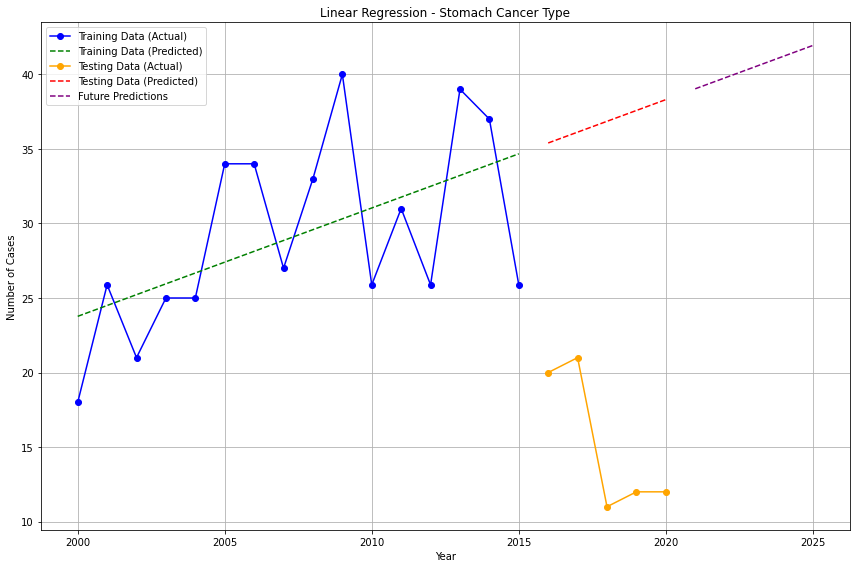

In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import psutil
import time

# Function to get CPU percent and Memory usage
def get_system_metrics():
    cpu_percent = psutil.cpu_percent()
    memory_mb = psutil.virtual_memory().used / (1024 ** 2)
    return cpu_percent, memory_mb

# Your data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# List of cancer types
cancer_columns = ['Bladder', 'Brain', 'Breast', 'Bronchus_Lung', 'Colorectal', 'Leukemia', 'Non_Hodgkins_Lymphoma', 'Stomach']

# Initialize a DataFrame to store results
results_df = pd.DataFrame(columns=['Cancer_Type', 'Model', 'Training_RMSE', 'Testing_RMSE', 'Training_MAE', 'Testing_MAE', 'Training_R_Squared', 'Testing_R_Squared', 'CPU_Before', 'CPU_After', 'Memory_Before_MB', 'Memory_After_MB', 'Training_Time', 'Percentage_Change'])

# Calculate future predictions outside the loop
future_years = np.arange(2021, 2026).reshape(-1, 1)

# Augmentation and Imputation Loop
for cancer_type in cancer_columns:
    print(f"\nAugmenting and Imputing {cancer_type} Data:")

    # Select the cancer type column as the target variable
    target = data[cancer_type].values.reshape(-1, 1)

    # Augmentation: Example - Adding random noise
    augmented_data = data.copy()
    augmented_data[cancer_type] += np.random.normal(0, 1, len(data))

    # Imputation: Example - Simple mean imputation
    imputed_data = data.copy()
    missing_indices = np.random.choice(len(data), size=int(0.2 * len(data)), replace=False)
    imputed_data.loc[missing_indices, cancer_type] = np.nan
    imputed_data[cancer_type].fillna(imputed_data[cancer_type].mean(), inplace=True)

    # Combine Augmented and Imputed Data
    integrated_data = augmented_data.copy()
    integrated_data[cancer_type] = imputed_data[cancer_type]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(integrated_data['Year'].values.reshape(-1, 1), integrated_data[cancer_type].values.reshape(-1, 1), test_size=0.2, shuffle=False)

    # Initialize the Linear Regression model
    model = LinearRegression()

    # Measure CPU percent and Memory before training
    cpu_before, memory_before = get_system_metrics()

    # Training the model
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time

    # Measure CPU percent and Memory after training
    cpu_after, memory_after = get_system_metrics()

    # Predictions
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)

    # Evaluation Metrics
    rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))
    mae_train = mean_absolute_error(y_train, train_predictions)
    r2_train = r2_score(y_train, train_predictions)

    rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
    mae_test = mean_absolute_error(y_test, test_predictions)
    r2_test = r2_score(y_test, test_predictions)

    # Print Evaluation Metrics
    print(f"Training RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, R-squared: {r2_train:.2f}")
    print(f"Testing RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, R-squared: {r2_test:.2f}")

    # Print System Metrics
    print(f"CPU Percent: Before={cpu_before}%, After={cpu_after}%")
    print(f"Memory Usage: Before={memory_before:.2f} MB, After={memory_after:.2f} MB")
    print(f"Training Time: {training_time:.2f} seconds\n")

    # Calculate percentage change in cancer incidents
    last_year_actual = y_test[-1][0]
    future_predictions = model.predict(future_years)
    predicted_next_year = future_predictions[0][0]
    percentage_change = ((predicted_next_year - last_year_actual) / last_year_actual) * 100

    print(f"Percentage Change in {cancer_type} Incidents: {percentage_change:.2f}%\n")

    # Save results to the DataFrame
    results_df = results_df.append({
        'Cancer_Type': cancer_type,
        'Model': 'Linear Regression',
        'Training_RMSE': rmse_train,
        'Testing_RMSE': rmse_test,
        'Training_MAE': mae_train,
        'Testing_MAE': mae_test,
        'Training_R_Squared': r2_train,
        'Testing_R_Squared': r2_test,
        'CPU_Before': cpu_before,
        'CPU_After': cpu_after,
        'Memory_Before_MB': memory_before,
        'Memory_After_MB': memory_after,
        'Training_Time': training_time,
        'Percentage_Change': percentage_change
    }, ignore_index=True)

    # Plotting
    plt.figure(figsize=(12, 8))

    # Training fit
    plt.plot(X_train, y_train, label='Training Data (Actual)', marker='o', linestyle='-', color='blue')
    plt.plot(X_train, train_predictions, label='Training Data (Predicted)', linestyle='--', color='green')

    # Testing fit
    plt.plot(X_test, y_test, label='Testing Data (Actual)', marker='o', linestyle='-', color='orange')
    plt.plot(X_test, test_predictions, label='Testing Data (Predicted)', linestyle='--', color='red')

    # Future predictions
    plt.plot(future_years, future_predictions, label='Future Predictions', linestyle='--', color='purple')

    plt.title(f'Linear Regression - {cancer_type} Cancer Type')
    plt.xlabel('Year')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Adjust layout for better spacing

    # Save the plot
    plt.savefig(f'{cancer_type}_linear_regression_plot.png')
    plt.show()

# Save the results DataFrame to a CSV file
results_df.to_csv('linear_regression_results.csv', index=False)


In [4]:
!pip install fancyimpute 

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.0/1.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 12.8/12.8 MB 194.3 kB/s eta 0:00:00
     -------------------------------------- 72.0/72.0 kB 438.2 kB/s eta 0:00:00
     ---------------------------------------- 8.4/8.4 MB 193.1 kB/s eta 0:00:00
     ------------------------------------- 227.7/227.7 kB 80.9 kB/s eta 0:00:00
     ------------------------------------ 292.9/292.9 kB 323.1 kB/s eta 0:00:00
     ------------------------------------ 355.1/355.1 kB 490.5 kB/s eta 0:00:00
     -------------------------------------- 85.1/85.1 kB 599.1 kB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=db5fcbeddb30e8556020d41230090f7c7a9d3065978e1dc5781c3d98d16bc8b


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Function to generate augmented data
def augment_data(original_data, factor=2):
    augmented_data = original_data.copy()
    for _ in range(factor - 1):
        augmented_data = augmented_data.append(original_data + np.random.normal(scale=1, size=original_data.shape), ignore_index=True)
    return augmented_data

# Function to add missing values to a percentage of the data
def add_missing_values(data, missing_ratio=0.2):
    mask = np.random.rand(*data.shape) < missing_ratio
    return data.mask(mask)

# Function to impute missing values using IterativeImputer
def impute_data(data_with_missing):
    imputer = IterativeImputer(max_iter=10, random_state=0)
    return imputer.fit_transform(data_with_missing)

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Augment the training data
augmented_train_data = augment_data(train_data)

# Add missing values to the augmented training data
augmented_train_data_with_missing = add_missing_values(augmented_train_data)

# Impute missing values using IterativeImputer
imputed_augmented_train_data = impute_data(augmented_train_data_with_missing)

# Train a model on the original and imputed augmented data
model_original = LinearRegression()
model_original.fit(train_data[['Year']], train_data['Bladder'])
original_predictions = model_original.predict(test_data[['Year']])

model_imputed = LinearRegression()
model_imputed.fit(imputed_augmented_train_data[:, 0].reshape(-1, 1), imputed_augmented_train_data[:, 1])
imputed_predictions = model_imputed.predict(test_data[['Year']])

# Evaluate R-squared on original and imputed predictions
r2_original = r2_score(test_data['Bladder'], original_predictions)
r2_imputed = r2_score(test_data['Bladder'], imputed_predictions)

# Display results
print(f"R-squared on Original Data: {r2_original:.2f}")
print(f"R-squared after Augmentation and Imputation: {r2_imputed:.2f}")


R-squared on Original Data: -0.09
R-squared after Augmentation and Imputation: -0.21


C:\Users\Storm\AppData\Local\Temp/ipykernel_18276/3229619543.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  augmented_data = augmented_data.append(original_data + np.random.normal(scale=1, size=original_data.shape), ignore_index=True)
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\Storm\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer

# Sample data with additional cancer types
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Lung_Cancer': [40, 42, 38, 35, 48, 55, 78, 60, 45, 50, 40, 38, 34, 42, 65, 42, 72, 60, 50, 58, 30],
    'Liver_Cancer': [18, 20, 22, 25, 30, 38, 40, 35, 30, 25, 28, 32, 30, 25, 40, 30, 45, 48, 38, 42, 20],
    'Prostate_Cancer': [80, 85, 88, 82, 95, 105, 120, 110, 100, 92, 80, 75, 78, 85, 98, 88, 105, 100, 90, 92, 78],
    # Add more cancer types as needed
})

# Function to generate lagged features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for column in data.columns[1:]:  # Exclude 'Year'
        lagged_data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return lagged_data.dropna()

# Function to generate synthetic data with variations
def generate_synthetic_data(data, num_samples=100, noise_scale=5):
    synthetic_data = pd.DataFrame()
    for _ in range(num_samples):
        synthetic_sample = data.iloc[:, 1:] + np.random.normal(scale=noise_scale, size=data.iloc[:, 1:].shape)
        synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)
    return synthetic_data

# Generate lagged features
lagged_data = create_lagged_features(data, lag=1)

# Generate synthetic data
synthetic_data = generate_synthetic_data(data, num_samples=100, noise_scale=5)

# Split data into train and test sets
train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

# Impute missing values using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_train_data = imputer.fit_transform(train_data)

# Train a model on the original and imputed data
model_original = LinearRegression()
model_original.fit(train_data[['Year', 'Lung_Cancer_lag1', 'Liver_Cancer_lag1', 'Prostate_Cancer_lag1']], train_data['Lung_Cancer'])
original_predictions = model_original.predict(test_data[['Year', 'Lung_Cancer_lag1', 'Liver_Cancer_lag1', 'Prostate_Cancer_lag1']])

model_imputed = LinearRegression()
model_imputed.fit(imputed_train_data[:, [0, 2, 3, 4]], imputed_train_data[:, 1])
imputed_predictions = model_imputed.predict(test_data[['Year', 'Lung_Cancer_lag1', 'Liver_Cancer_lag1', 'Prostate_Cancer_lag1']])

# Evaluate R-squared on original and imputed predictions
r2_original = r2_score(test_data['Lung_Cancer'], original_predictions)
r2_imputed = r2_score(test_data['Lung_Cancer'], imputed_predictions)

# Display results
print(f"R-squared on Original Data: {r2_original:.2f}")
print(f"R-squared after Augmentation and Imputation: {r2_imputed:.2f}")


R-squared on Original Data: -0.12
R-squared after Augmentation and Imputation: -12.69


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Function to generate lagged features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for column in data.columns[1:]:  # Exclude 'Year'
        lagged_data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return lagged_data.dropna()

# Function to generate synthetic data with variations
def generate_synthetic_data(data, num_samples=100, noise_scale=5):
    synthetic_data = pd.DataFrame()
    for _ in range(num_samples):
        synthetic_sample = data.iloc[:, 1:] + np.random.normal(scale=noise_scale, size=data.iloc[:, 1:].shape)
        synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)
    return synthetic_data

# Generate lagged features
lagged_data = create_lagged_features(data, lag=1)

# Generate synthetic data
synthetic_data = generate_synthetic_data(data, num_samples=100, noise_scale=5)

# Split data into train and test sets
train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

# Impute missing values using IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_train_data = imputer.fit_transform(train_data)

# Train a model on the original and imputed data
model_original = LinearRegression()
model_original.fit(train_data[['Year', 'Bladder_lag1', 'Brain_lag1', 'Breast_lag1', 'Bronchus_Lung_lag1', 'Colorectal_lag1', 'Leukemia_lag1', 'Non_Hodgkins_Lymphoma_lag1', 'Stomach_lag1']], train_data['Bladder'])
original_predictions = model_original.predict(test_data[['Year', 'Bladder_lag1', 'Brain_lag1', 'Breast_lag1', 'Bronchus_Lung_lag1', 'Colorectal_lag1', 'Leukemia_lag1', 'Non_Hodgkins_Lymphoma_lag1', 'Stomach_lag1']])

model_imputed = LinearRegression()
model_imputed.fit(imputed_train_data[:, [0, 2, 3, 4, 5, 6, 7, 8, 9]], imputed_train_data[:, 1])
imputed_predictions = model_imputed.predict(test_data[['Year', 'Bladder_lag1', 'Brain_lag1', 'Breast_lag1', 'Bronchus_Lung_lag1', 'Colorectal_lag1', 'Leukemia_lag1', 'Non_Hodgkins_Lymphoma_lag1', 'Stomach_lag1']])

# Evaluate R-squared on original and imputed predictions
r2_original = r2_score(test_data['Bladder'], original_predictions)
r2_imputed = r2_score(test_data['Bladder'], imputed_predictions)

# Display results
print(f"R-squared on Original Data: {r2_original:.2f}")
print(f"R-squared after Augmentation and Imputation: {r2_imputed:.2f}")


R-squared on Original Data: -4.51
R-squared after Augmentation and Imputation: -2.29


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [18]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer
from sklearn.decomposition import PCA

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Function to generate lagged features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for column in data.columns[1:]:  # Exclude 'Year'
        lagged_data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return lagged_data.dropna()

# Function to generate synthetic data with variations
def generate_synthetic_data(data, num_samples=100, noise_scale=5):
    synthetic_data = pd.DataFrame()
    for _ in range(num_samples):
        synthetic_sample = data.iloc[:, 1:] + np.random.normal(scale=noise_scale, size=data.iloc[:, 1:].shape)
        synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)
    return synthetic_data

# Function to apply PCA and return R-squared
def apply_pca_and_evaluate(data, lag=1):
    # Generate lagged features
    lagged_data = create_lagged_features(data, lag=lag)

    # Generate synthetic data
    synthetic_data = generate_synthetic_data(data, num_samples=100, noise_scale=5)

    # Combine original and synthetic data for PCA
    combined_data = pd.concat([lagged_data, synthetic_data], ignore_index=True)

    # Impute missing values using IterativeImputer
    imputer = IterativeImputer(max_iter=10, random_state=0)
    combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data.iloc[:, 1:]), columns=combined_data.columns[1:])

    # Determine the number of components dynamically
    num_components = min(combined_data_imputed.shape[0], combined_data_imputed.shape[1])

    # Apply PCA
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(combined_data_imputed)

    # Split data into train and test sets
    train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

    # Impute missing values using IterativeImputer for train data
    imputer = IterativeImputer(max_iter=10, random_state=0)
    imputed_train_data = pd.DataFrame(imputer.fit_transform(train_data.iloc[:, 1:]), columns=train_data.columns[1:])

    # Train a model on the original and imputed data
    model_original = LinearRegression()
    model_original.fit(imputed_train_data, train_data.iloc[:, 1])
    original_predictions = model_original.predict(test_data.iloc[:, 1:])

    # Train a model on PCA-reduced data
    pca_model = LinearRegression()
    pca_train_data = pd.DataFrame(data=pca_result[:len(lagged_data)], columns=[f'PC{i}' for i in range(1, pca_result.shape[1] + 1)])
    pca_model.fit(pca_train_data, lagged_data.iloc[:, 1])
    pca_predictions = pca_model.predict(pca_result[len(lagged_data):])

    # Evaluate R-squared on original and PCA predictions
    r2_original = r2_score(test_data.iloc[:, 1], original_predictions)
    r2_pca = r2_score(test_data.iloc[:, 1], pca_predictions)

    print(f"R-squared on Original Data (lag={lag}): {r2_original:.2f}")
    print(f"R-squared after Augmentation and Imputation (lag={lag}): {r2_pca:.2f}")
    print(f"Explained variance ratio before PCA (lag={lag}): {np.sum(pca.explained_variance_ratio_):.2f}")
    print(f"Explained variance ratio after PCA (lag={lag}): {np.sum(pca.explained_variance_ratio_[:num_components]):.2f}")

# Apply PCA and evaluate for each cancer type
for cancer_type in data.columns[1:]:
    print(f"\nProcessing {cancer_type} cancer:")
    apply_pca_and_evaluate(data[['Year', cancer_type]], lag=1)



Processing Bladder cancer:


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [4, 2100]

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer
from sklearn.decomposition import PCA

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Function to generate lagged features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for column in data.columns[1:]:  # Exclude 'Year'
        lagged_data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return lagged_data.dropna()

# Function to generate synthetic data with variations
def generate_synthetic_data(data, num_samples=100, noise_scale=5):
    synthetic_data = pd.DataFrame()
    for _ in range(num_samples):
        synthetic_sample = data.iloc[:, 1:] + np.random.normal(scale=noise_scale, size=data.iloc[:, 1:].shape)
        synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)
    return synthetic_data

# Function to apply PCA and return R-squared
def apply_pca_and_evaluate(data, lag=1, num_components=None):
    # Generate lagged features
    lagged_data = create_lagged_features(data, lag=lag)

    # Generate synthetic data
    synthetic_data = generate_synthetic_data(data, num_samples=100, noise_scale=5)

    # Combine original and synthetic data for PCA
    combined_data = pd.concat([lagged_data, synthetic_data], ignore_index=True)

    # Impute missing values using IterativeImputer
    imputer = IterativeImputer(max_iter=10, random_state=0)
    combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data.iloc[:, 1:]), columns=combined_data.columns[1:])

    # Apply PCA with the minimum of the number of samples and features as components
    if num_components is None:
        num_components = min(combined_data_imputed.shape[0], combined_data_imputed.shape[1])

    # Apply PCA
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(combined_data_imputed)

    # Split data into train and test sets
    train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

    # Impute missing values using IterativeImputer for train data
    imputer = IterativeImputer(max_iter=10, random_state=0)
    imputed_train_data = pd.DataFrame(imputer.fit_transform(train_data.iloc[:, 1:]), columns=train_data.columns[1:])

    # Train a model on the original and imputed data
    model_original = LinearRegression()
    model_original.fit(imputed_train_data, train_data.iloc[:, 1])
    original_predictions = model_original.predict(test_data.iloc[:, 1:])

    # Train a model on PCA-reduced data
    pca_model = LinearRegression()
    pca_train_data = pd.DataFrame(data=pca_result[:len(lagged_data)], columns=[f'PC{i}' for i in range(1, pca_result.shape[1] + 1)])
    pca_model.fit(pca_train_data, lagged_data.iloc[:, 1])
    pca_predictions = pca_model.predict(pca_result[len(lagged_data):])

    # Evaluate R-squared on original and PCA predictions
    r2_original = r2_score(test_data.iloc[:, 1], original_predictions)
    r2_pca = r2_score(test_data.iloc[:, 1], pca_predictions)

    print(f"R-squared on Original Data (lag={lag}): {r2_original:.2f}")
    print(f"R-squared after Augmentation and Imputation (lag={lag}): {r2_pca:.2f}")
    print(f"Explained variance ratio before PCA (lag={lag}): {np.sum(pca.explained_variance_ratio_):.2f}")
    print(f"Number of components selected by PCA (lag={lag}): {num_components}")

# Loop through each cancer type and apply PCA
for cancer_type in data.columns[1:]:
    print(f"\nProcessing {cancer_type} cancer:")
    apply_pca_and_evaluate(data[['Year', cancer_type]], lag=1)



Processing Bladder cancer:


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [4, 2100]

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer
from sklearn.decomposition import PCA

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Function to generate lagged features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for column in data.columns[1:]:  # Exclude 'Year'
        lagged_data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return lagged_data.dropna()

# Function to generate synthetic data with variations
def generate_synthetic_data(data, num_samples=100, noise_scale=5):
    synthetic_data = pd.DataFrame()
    for _ in range(num_samples):
        synthetic_sample = data.iloc[:, 1:] + np.random.normal(scale=noise_scale, size=data.iloc[:, 1:].shape)
        synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)
    return synthetic_data

# Function to apply PCA and return R-squared
def apply_pca_and_evaluate(data, lag=1, num_components=None):
    # Generate lagged features
    lagged_data = create_lagged_features(data, lag=lag)

    # Generate synthetic data
    synthetic_data = generate_synthetic_data(data, num_samples=100, noise_scale=5)

    # Combine original and synthetic data for PCA
    combined_data = pd.concat([lagged_data, synthetic_data], ignore_index=True)

    # Impute missing values using IterativeImputer
    imputer = IterativeImputer(max_iter=10, random_state=0)
    combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data.iloc[:, 1:]), columns=combined_data.columns[1:])

    # Apply PCA with the minimum of the number of samples and features as components
    if num_components is None:
        num_components = min(combined_data_imputed.shape[0], combined_data_imputed.shape[1])

    # Apply PCA
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(combined_data_imputed)

    # Split data into train and test sets
    train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

    # Impute missing values using IterativeImputer for train data
    imputer = IterativeImputer(max_iter=10, random_state=0)
    imputed_train_data = pd.DataFrame(imputer.fit_transform(train_data.iloc[:, 1:]), columns=train_data.columns[1:])

    # Train a model on the original and imputed data
    model_original = LinearRegression()
    model_original.fit(imputed_train_data, train_data.iloc[:, 1])
    original_predictions = model_original.predict(test_data.iloc[:, 1:])

    # Train a model on PCA-reduced data
    pca_model = LinearRegression()
    pca_train_data = pd.DataFrame(data=pca_result[:len(lagged_data)], columns=[f'PC{i}' for i in range(1, pca_result.shape[1] + 1)])
    pca_model.fit(pca_train_data, lagged_data.iloc[:, 1])
    pca_predictions = pca_model.predict(pca_result[len(lagged_data):])

    # Evaluate R-squared on original and PCA predictions
    r2_original = r2_score(test_data.iloc[:, 1], original_predictions)
    r2_pca = r2_score(test_data.iloc[:, 1], pca_predictions)

    print(f"R-squared on Original Data (lag={lag}): {r2_original:.2f}")
    print(f"R-squared after Augmentation and Imputation (lag={lag}): {r2_pca:.2f}")
    print(f"Explained variance ratio before PCA (lag={lag}): {np.sum(pca.explained_variance_ratio_):.2f}")
    print(f"Number of components selected by PCA (lag={lag}): {num_components}")

# Loop through each cancer type and apply PCA
for cancer_type in data.columns[1:]:
    print(f"\nProcessing {cancer_type} cancer:")
    apply_pca_and_evaluate(data[['Year', cancer_type]], lag=1)



Processing Bladder cancer:


C:\Users\Storm\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [4, 2100]

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer
from sklearn.decomposition import PCA

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Function to generate lagged features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for column in data.columns[1:]:  # Exclude 'Year'
        lagged_data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return lagged_data.dropna()

# Function to generate synthetic data with variations
def generate_synthetic_data(data, num_samples=100, noise_scale=5):
    synthetic_data = pd.DataFrame()
    for _ in range(num_samples):
        synthetic_sample = data.iloc[:, 1:] + np.random.normal(scale=noise_scale, size=data.iloc[:, 1:].shape)
        synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)
    return synthetic_data

# Function to apply PCA and return R-squared
def apply_pca_and_evaluate(data, lag_range=None, num_components=None):
    if lag_range is None:
        lag_range = [1]

    for lag in lag_range:
        # Generate lagged features
        lagged_data = create_lagged_features(data, lag=lag)

        # Generate synthetic data
        synthetic_data = generate_synthetic_data(data, num_samples=100, noise_scale=5)

        # Combine original and synthetic data for PCA
        combined_data = pd.concat([lagged_data, synthetic_data], ignore_index=True)

        # Impute missing values using IterativeImputer
        imputer = IterativeImputer(max_iter=10, random_state=0)
        combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data.iloc[:, 1:]), columns=combined_data.columns[1:])

        # Apply PCA with the minimum of the number of samples and features as components
        if num_components is None:
            num_components = min(combined_data_imputed.shape[0], combined_data_imputed.shape[1])

        # Apply PCA
        pca = PCA(n_components=num_components)
        pca_result = pca.fit_transform(combined_data_imputed)

        # Split data into train and test sets
        train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

        # Impute missing values using IterativeImputer for train data
        imputer = IterativeImputer(max_iter=10, random_state=0)
        imputed_train_data = pd.DataFrame(imputer.fit_transform(train_data.iloc[:, 1:]), columns=train_data.columns[1:])

        # Train a model on the original and imputed data
        model_original = LinearRegression()
        model_original.fit(imputed_train_data, train_data.iloc[:, 1])
        original_predictions = model_original.predict(test_data.iloc[:, 1:])

        # Train a model on PCA-reduced data
        pca_model = LinearRegression()
        pca_train_data = pd.DataFrame(data=pca_result[:len(lagged_data)], columns=[f'PC{i}' for i in range(1, pca_result.shape[1] + 1)])
        pca_model.fit(pca_train_data, lagged_data.iloc[:, 1])
        pca_predictions = pca_model.predict(pca_result[len(lagged_data):])

        # Evaluate R-squared on original and PCA predictions
        r2_original = r2_score(test_data.iloc[:, 1], original_predictions)
        r2_pca = r2_score(test_data.iloc[:, 1], pca_predictions)

        print(f"R-squared on Original Data (lag={lag}): {r2_original:.2f}")
        print(f"R-squared after Augmentation and Imputation (lag={lag}): {r2_pca:.2f}")
        print(f"Explained variance ratio before PCA (lag={lag}): {np.sum(pca.explained_variance_ratio_):.2f}")
        print(f"Number of components selected by PCA (lag={lag}): {num_components}")

# Loop through each cancer type and apply PCA
for cancer_type in data.columns[1:]:
    print(f"\nProcessing {cancer_type} cancer:")
    apply_pca_and_evaluate(data[['Year', cancer_type]], lag_range=[1, 2, 3], num_components=5)



Processing Bladder cancer:


ValueError: n_components=5 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from fancyimpute import IterativeImputer
from sklearn.decomposition import PCA

# Your cancer data
data = pd.DataFrame({
    'Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
    'Bladder': [23, 19, 19, 18, 29, 43, 62, 30, 29, 34, 25, 25, 22, 29, 40, 25, 41, 41, 29, 37, 13],
    'Brain': [24, 26, 28, 26, 40, 44, 68, 42, 31, 29, 35, 36, 30, 31, 31, 32, 13, 16, 24, 14, 9],
    'Breast': [68, 90, 86, 53, 91, 103, 133, 124, 114, 97, 157, 144, 143, 150, 244, 179, 219, 190, 130, 199, 133],
    'Bronchus_Lung': [37, 35, 36, 31, 74, 101, 101, 79, 89, 75, 61, 36, 63, 71, 99, 56, 15, 35, 9, 37, 39],
    'Colorectal': [22, 22, 24, 10, 36, 31, 42, 24, 37, 36, 47, 49, 53, 49, 70, 57, 24, 39, 35, 46, 21],
    'Leukemia': [20, 20, 25, 23, 33, 39, 63, 52, 48, 32, 59, 46, 53, 35, 53, 47, 33, 55, 38, 41, 46],
    'Non_Hodgkins_Lymphoma': [47, 18, 27, 18, 31, 33, 35, 18, 31, 23, 48, 39, 37, 28, 49, 31, 34, 34, 3, 22, 30],
    'Stomach': [18, 18, 21, 25, 25, 34, 34, 27, 33, 40, 20, 31, 26, 39, 37, 27, 20, 21, 11, 12, 12]
})

# Function to generate lagged features
def create_lagged_features(data, lag=1):
    lagged_data = data.copy()
    for column in data.columns[1:]:  # Exclude 'Year'
        lagged_data[f'{column}_lag{lag}'] = data[column].shift(lag)
    return lagged_data.dropna()

# Function to generate synthetic data with variations
def generate_synthetic_data(data, num_samples=100, noise_scale=5):
    synthetic_data = pd.DataFrame()
    for _ in range(num_samples):
        synthetic_sample = data.iloc[:, 1:] + np.random.normal(scale=noise_scale, size=data.iloc[:, 1:].shape)
        synthetic_data = pd.concat([synthetic_data, synthetic_sample], ignore_index=True)
    return synthetic_data

# Function to apply PCA and return R-squared
def apply_pca_and_evaluate(data, lag_range=None, num_components=None):
    if lag_range is None:
        lag_range = [1]

    for lag in lag_range:
        # Generate lagged features
        lagged_data = create_lagged_features(data, lag=lag)

        # Generate synthetic data
        synthetic_data = generate_synthetic_data(data, num_samples=100, noise_scale=5)

        # Combine original and synthetic data for PCA
        combined_data = pd.concat([lagged_data, synthetic_data], ignore_index=True)

        # Impute missing values using IterativeImputer
        imputer = IterativeImputer(max_iter=10, random_state=0)
        combined_data_imputed = pd.DataFrame(imputer.fit_transform(combined_data.iloc[:, 1:]), columns=combined_data.columns[1:])

        # Apply PCA with the minimum of the number of samples and features as components
        if num_components is None:
            num_components = min(combined_data_imputed.shape[0], combined_data_imputed.shape[1])

        # Apply PCA
        pca = PCA(n_components=num_components)
        pca_result = pca.fit_transform(combined_data_imputed)

        # Split data into train and test sets
        train_data, test_data = train_test_split(lagged_data, test_size=0.2, shuffle=False)

        # Impute missing values using IterativeImputer for train data
        imputer = IterativeImputer(max_iter=10, random_state=0)
        imputed_train_data = pd.DataFrame(imputer.fit_transform(train_data.iloc[:, 1:]), columns=train_data.columns[1:])

        # Train a model on the original and imputed data
        model_original = LinearRegression()
        model_original.fit(imputed_train_data, train_data.iloc[:, 1])
        original_predictions = model_original.predict(test_data.iloc[:, 1:])

        # Train a model on PCA-reduced data
        pca_model = LinearRegression()
        pca_train_data = pd.DataFrame(data=pca_result[:len(lagged_data)], columns=[f'PC{i}' for i in range(1, pca_result.shape[1] + 1)])
        pca_model.fit(pca_train_data, train_data.iloc[:, 1])
        pca_predictions = pca_model.predict(pca_result[:len(lagged_data)])

        # Evaluate R-squared on original and PCA predictions
        r2_original = r2_score(test_data.iloc[:, 1], original_predictions)
        r2_pca = r2_score(test_data.iloc[:, 1], pca_predictions)

        print(f"R-squared on Original Data (lag={lag}): {r2_original:.2f}")
        print(f"R-squared after Augmentation and Imputation (lag={lag}): {r2_pca:.2f}")
        print(f"Explained variance ratio before PCA (lag={lag}): {np.sum(pca.explained_variance_ratio_):.2f}")
        print(f"Number of components selected by PCA (lag={lag}): {num_components}")

# Loop through each cancer type and apply PCA
for cancer_type in data.columns[1:]:
    print(f"\nProcessing {cancer_type} cancer:")
    apply_pca_and_evaluate(data[['Year', cancer_type]], lag_range=[1, 2, 3], num_components=5)



Processing Bladder cancer:


ValueError: n_components=5 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'